Individual differences
======================

Before striking the retina incident light must first travel through the lens and other ocular media, which act as prereceptoral filters and effectively shift the spectral sensitivity of the underlying photoreceptors. 

Although the CIE define average colorimetric observer models, there is considerable variation in photoreceptor spectral sensitivities due to interindividual differences in ocular physiology. 

The sources of variation include:

  - Lens pigment density
  - Macular pigment density
  - Polymorphism of the photopigments
  - [Optical density of the photopigments](http://www.cvrl.org/database/text/intros/introod.htm)


Lens pigment density and age
----------------------------

The crystalline lens has a yellow pigment that accumulates with age due absorption of UV radiation. This pigment acts as a prereceptoral filter that attenuates blue light.

<img src="../../img/lensesAge.jpg" width="200" height="200" />     

Stockman, Sharpe and Fach (1999) report estimates of the lens density function $D_{ocul}$ of an average 32-year-old observer, assuming a pupil diameter < 3mm. 


,D_ocul,D_ocul_1,D_ocul_2
Wavelength,,,
390,2.44330,0.809599,1.633701
395,2.10410,0.735718,1.368382
400,1.76490,0.661837,1.103063
405,1.42570,0.587956,0.837744
410,1.13738,0.530708,0.606672
...,...,...,...
760,0.00000,0.000000,0.000000
765,0.00000,0.000000,0.000000
770,0.00000,0.000000,0.000000


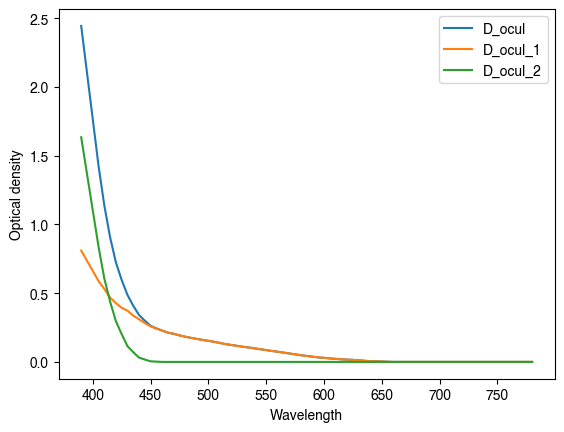

In [1]:
from pysilsub.CIE import get_CIEPO06_optical_density

docul = get_CIEPO06_optical_density()
docul.plot(ylabel='Optical density')
docul

According to Pokorny, Smith and Lutze (1987), $D_{ocul}(\lambda)$ can be separated into two components. The first, $D_{ocul^1}(\lambda)$, represents a portion that is affected by ageing after 20 years, and the second, $D_{ocul^2}(\lambda)$ represents a portion that is stable after 20 years. 

The optical density of the lens of an average observer between the ages of 20 and 60 years is given by:

$D_{ocul}(\lambda) = D_{ocul, 1}(\lambda) [1 + 0.02(A-32)] + D_{ocul, 2}(\lambda)$

For an average observer over the age of 60 the equation is:

$D_{ocul}(\lambda) = D_{ocul, 1}(\lambda) [1.56 + 0.0667(A-60)] + D_{ocul, 2}(\lambda)$

Both where $A$ is the observer age and $D_{ocul^2}(\lambda)$ are the Stockman and Sharpe (2000) lens density data scaled to represent a 32-year-old observer (the average age of the Stiles and Burch observers) with a small pupil (< 3 mm). 

Note: Lens density for a completely open pupil (> 7 mm) can be estimated by multiplying the data by 0.86207.

We can estimate lens optical density, $OD$, across the ages and convert to transmittance, $T$, for an intuitive visual.

$T = 10^{-OD} \times 100$

$OD = -log\frac{T}{100}$

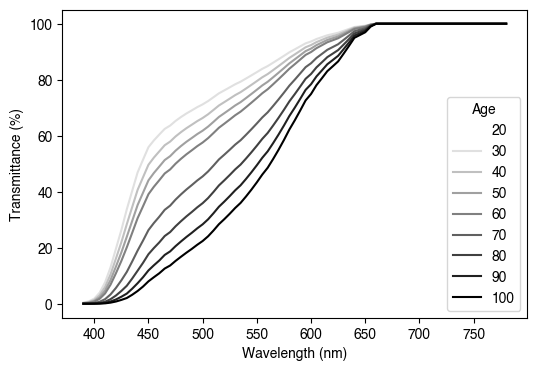

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def estimate_lens_density(age):
    if age <= 60.0:
        correct_lomd = (
            docul["D_ocul_1"].mul(1 + (0.02 * (age - 32)))
            + docul["D_ocul_2"]
        )
    else:
        correct_lomd = (
            docul["D_ocul_1"].mul(1.56 + (0.0667 * (age - 60)))
            + docul["D_ocul_2"]
        )
    return correct_lomd
    

ages = range(20, 101, 10)
densities = [estimate_lens_density(age) for age in ages]
    
fig, ax = plt.subplots(figsize=(6, 4))
colors = plt.cm.gray(np.linspace(0, 1, len(densities)))[::-1]

for i, (age, denisity) in enumerate(zip(ages, densities)):
    transmittence = (10**-denisity)*100
    plt.plot(transmittence, c=colors[i], label=age)
plt.legend(title='Age')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmittance (%)');


Macular pigment density and field size
--------------------------------------

The macular lutea of the retina is pigmented yellow by a concentration of xanthophyll carotenoids (lutein, xeaxanthin, meso-xeaxanthin) which act as a blue light filter and may serve to protect foveal photoreceptors from phototoxic blue light radiation. By absorbing short wavelengths, much like the lens pigment, the macular pigment alters spectral sensitivity of the underlying photoreceptors, which means that light and colour perception varies within observers as a function of field size and viewing angle, and between observers as a function of macular pigment density and distribution. 

<img src="../../img/fundus.png" width="200" height="200" />

Interestingly, the only source of the carotenoids that constitute the macular pigment is from diet, so maybe that's why people think eating carots improves your eyesight. 


Wavelength
390    0.1295
395    0.1854
400    0.2480
405    0.3200
410    0.3900
        ...  
760    0.0000
765    0.0000
770    0.0000
775    0.0000
780    0.0000
Name: D_macula, Length: 79, dtype: float64

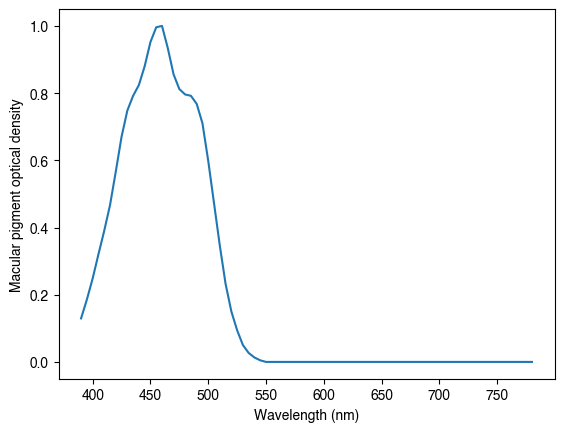

In [12]:
from pysilsub.CIE import get_CIEPO06_macula_density

dmac = get_CIEPO06_macula_density().squeeze()
dmac.plot(xlabel='Wavelength (nm)', ylabel='Macular pigment optical density')
dmac

We can simulate the macular pigment density for a range of field sizes.

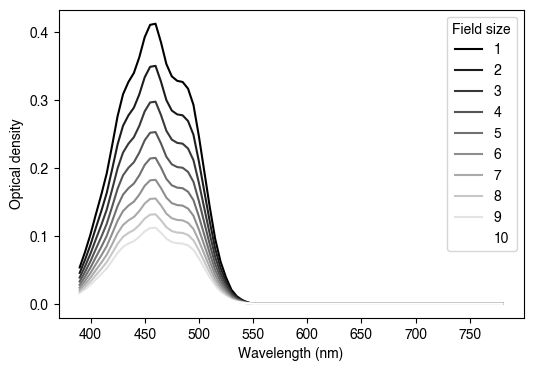

In [8]:
field_sizes = range(1, 11, 1)
corrected = []

for fs in field_sizes:
    corrected_rmd = dmac * (0.485 * np.exp(-fs / 6.132))

    corrected.append(corrected_rmd)
    

fig, ax = plt.subplots(figsize=(6, 4))
colors = plt.cm.gray(np.linspace(0, 1, len(field_sizes)))

for i, (fs, denisity) in enumerate(zip(field_sizes, corrected)):
    transmittence = (10**-denisity)*100
    plt.plot(denisity, c=colors[i], label=fs)
plt.legend(title='Field size')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Optical density'); 
